In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [9]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [27]:
df['GarageQual'].fillna("miss",inplace=True)

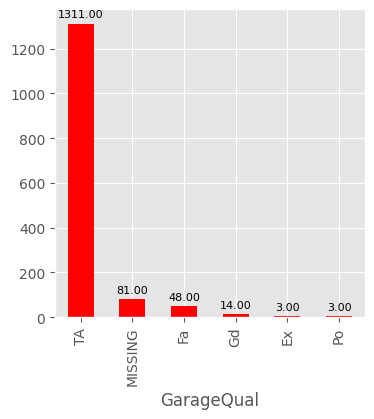

In [40]:
plt.figure(figsize=(4,4))
plt.style.use('ggplot')
ax =df['GarageQual'].value_counts().plot(kind='bar',color='red')

for i in ax.containers:
    ax.bar_label(i,fmt='%0.2f',label_type='edge',padding=3,fontsize=8) 

<Axes: xlabel='FireplaceQu', ylabel='count'>

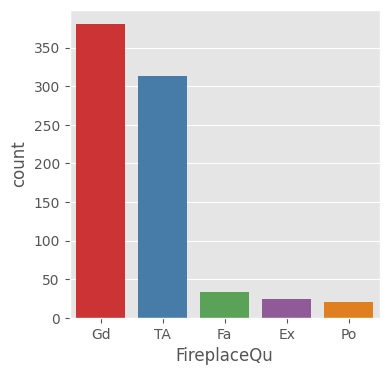

In [11]:
plt.figure(figsize=(4,4))
sns.barplot(df['FireplaceQu'].value_counts(),palette='Set1')

<Axes: ylabel='SalePrice'>

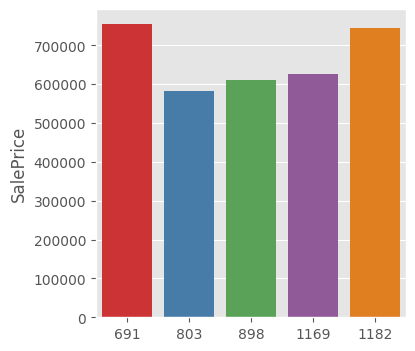

In [12]:
plt.figure(figsize=(4,4))
sns.barplot(df['SalePrice'].sort_values(ascending=0).head(5),palette='Set1')

## using sklearn 

In [13]:
x_train,x_test,y_train,y_test =train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [14]:
x_train.shape,x_test.shape


((1168, 2), (292, 2))

In [15]:
y_test.shape,y_train.shape

((292,), (1168,))

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [17]:
x_train =imputer.fit_transform(x_train)

In [18]:
x_train

array([['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ...,
       ['TA', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA']], shape=(1168, 2), dtype=object)

In [19]:
x_test=imputer.transform(x_test)

In [20]:
x_test.shape

(292, 2)

## using pandas

In [21]:
df['GarageQual'].fillna('MISSING',inplace=True)

<Axes: ylabel='count'>

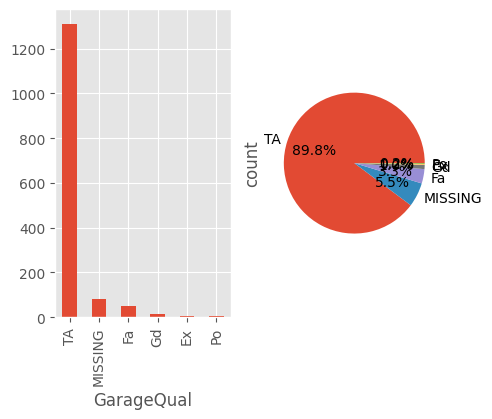

In [22]:
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(5,4))
df['GarageQual'].value_counts().plot(kind='bar',ax=ax1)
df['GarageQual'].value_counts().plot(kind='pie',ax=ax2,autopct='%0.1f%%')

In [23]:
df['FireplaceQu'].fillna('Missing',inplace=True)

<Axes: ylabel='count'>

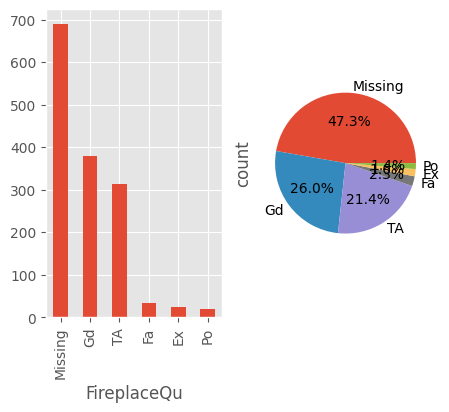

In [24]:
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(5,4))
df['FireplaceQu'].value_counts().plot(kind='bar',ax=ax1)
df['FireplaceQu'].value_counts().plot(kind='pie',ax=ax2,autopct='%0.1f%%')

### using sklearn missinge 

In [25]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing Sk')

In [26]:
x_train_= imputer.fit_transform(x_train)
x_test_=imputer.transform(x_test)